In [1]:
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
file_path = 'twitter_combined.txt'

In [3]:
edges = pd.read_csv(file_path, sep=' ', header=None, names=['source', 'target'])

In [4]:
import networkx as nx

# Create a graph from the edges
G = nx.from_pandas_edgelist(edges, 'source', 'target')


In [5]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 81306
Number of edges: 1342310


In [6]:
density = nx.density(G)
print(f"Network Density: {density}")


Network Density: 0.0004061093340594295


In [7]:
degree_centrality = nx.degree_centrality(G)
# Sort and print the top 5 nodes by degree centrality
sorted_degree = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodes by degree centrality:", sorted_degree)


Top 5 nodes by degree centrality: [(115485051, 0.041608757149006824), (40981798, 0.0398376483611094), (813286, 0.03703339278027181), (43003845, 0.0339216530348687), (3359851, 0.030625422790726275)]


In [8]:
#betweenness = nx.betweenness_centrality(G)
# Sort and print the top 5 nodes by betweenness centrality
#sorted_betweenness = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:5]
#print("Top 5 nodes by betweenness centrality:", sorted_betweenness)


In [9]:
# Remove self-loops from the graph
G.remove_edges_from(nx.selfloop_edges(G))

In [10]:
# Find the maximum k-core of the graph
k_core = nx.core_number(G)
max_k = max(k_core.values())
print(f"Maximum k-core: {max_k}")

# Extract the subgraph of the maximum k-core
k_core_subgraph = nx.k_core(G, k=max_k)
print(f"Number of nodes in the maximum k-core subgraph: {k_core_subgraph.number_of_nodes()}")


Maximum k-core: 96
Number of nodes in the maximum k-core subgraph: 130


In [11]:
# Degree Centrality within k-Core
degree_centrality_k_core = nx.degree_centrality(k_core_subgraph)
top_degree_centrality_k_core = sorted(degree_centrality_k_core.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodes by degree centrality within the k-core:", top_degree_centrality_k_core)

# Betweenness Centrality within k-Core
betweenness_centrality_k_core = nx.betweenness_centrality(k_core_subgraph)
top_betweenness_centrality_k_core = sorted(betweenness_centrality_k_core.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodes by betweenness centrality within the k-core:", top_betweenness_centrality_k_core)


Top 5 nodes by degree centrality within the k-core: [(297229855, 1.0), (357227113, 1.0), (256497288, 1.0), (399644859, 1.0), (297358566, 1.0)]
Top 5 nodes by betweenness centrality within the k-core: [(297229855, 0.0010250512954644506), (357227113, 0.0010250512954644506), (256497288, 0.0010250512954644506), (399644859, 0.0010250512954644506), (297358566, 0.0010250512954644506)]


In [12]:
from networkx.algorithms import community

communities_k_core = community.greedy_modularity_communities(k_core_subgraph)
print(f"Number of communities detected in the k-core: {len(communities_k_core)}")


Number of communities detected in the k-core: 2


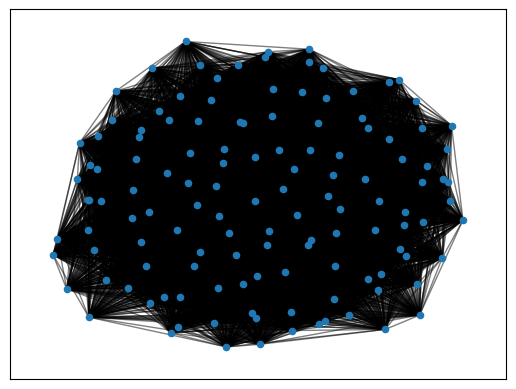

In [13]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(k_core_subgraph)  # Position nodes using the spring layout
for community in communities_k_core:
    nx.draw_networkx_nodes(k_core_subgraph, pos, nodelist=list(community), node_size=20)
nx.draw_networkx_edges(k_core_subgraph, pos, alpha=0.5)
plt.show()


In [14]:
#!pip install pyvis

In [15]:
from pyvis.network import Network

# Create a new Pyvis network
net = Network(notebook=True)

# Add nodes and edges from the k-core subgraph
for node, node_attrs in k_core_subgraph.nodes(data=True):
    net.add_node(node, title=str(node_attrs))

for source, target in k_core_subgraph.edges():
    net.add_edge(source, target)

# Customize the network's appearance
net.toggle_physics(True)  # Enable physics for automatic layout

# Display the interactive plot in the notebook
net.show("k_core_subgraph.html")


ModuleNotFoundError: No module named 'pyvis'

In [ ]:
#!pip install plotly


In [ ]:
import plotly.express as px
import pandas as pd

# Calculate degrees of all nodes
degrees = [val for (node, val) in G.degree()]

# Create a DataFrame
df_degrees = pd.DataFrame(degrees, columns=['degree'])

# Plotting degree distribution
fig = px.histogram(df_degrees, x='degree', nbins=50, title='Degree Distribution')
fig.update_xaxes(title='Degree')
fig.update_yaxes(title='Frequency')
fig.show()


In [ ]:
#  degree_centrality is a dictionary with nodes as keys and centrality as values
df_centrality = pd.DataFrame(degree_centrality.items(), columns=['node', 'centrality'])

# Sorting by centrality
df_centrality_sorted = df_centrality.sort_values(by='centrality', ascending=False).head(10)

# Plotting
fig = px.bar(df_centrality_sorted, x='node', y='centrality', title='Top 10 Nodes by Degree Centrality')
fig.update_xaxes(title='Node')
fig.update_yaxes(title='Degree Centrality')
fig.show()


In [ ]:
#  communities_k_core is a list of sets, where each set contains the nodes in one community
community_sizes = [len(comm) for comm in communities_k_core]

df_communities = pd.DataFrame({'community': range(1, len(community_sizes) + 1), 'size': community_sizes})

# Plotting community sizes
fig = px.bar(df_communities, x='community', y='size', title='Community Sizes')
fig.update_xaxes(title='Community')
fig.update_yaxes(title='Size')
fig.show()


In [ ]:
directory = 

In [ ]:
edges_frames = []
for filename in os.listdir(directory):
    if filename.endswith(".edges"):
        filepath = os.path.join(directory, filename)
        edges = pd.read_csv(filepath, sep=' ', header=None, names=['source', 'target'])
        edges_frames.append(edges)

In [ ]:
# Concatenate all edges dataframes
all_edges = pd.concat(edges_frames, ignore_index=True)

# Create a graph
G = nx.from_pandas_edgelist(all_edges, 'source', 'target')

In [ ]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


In [ ]:
density = nx.density(G)
print(f"Network Density: {density}")


In [ ]:
degree_centrality = nx.degree_centrality(G)
# Convert to a sorted list to identify top nodes
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by degree centrality:", sorted_degree[:5])


In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by betweenness centrality:", sorted_betweenness[:5])
